## Label an image based on a colormap

Text(0.5, 1.0, 'Labeled Image')

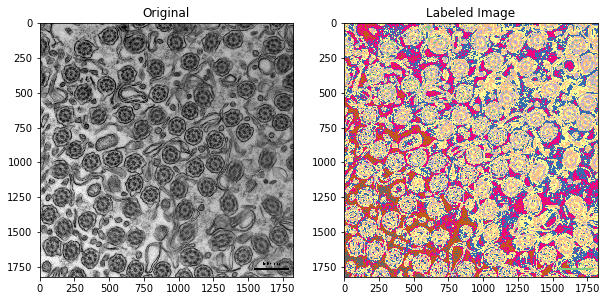

In [10]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# import the images, both original and ground truth.
img = cv2.imread('images/cilia.jpg')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cmap = plt.cm.Accent
norm = plt.Normalize(vmin=img_grayscale.min(), vmax=img_grayscale.max())
labeled_img = cmap(norm(img_grayscale))
cv2.imwrite('images/cilia_labeled.jpg', labeled_img)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Original')

fig.add_subplot(1,2,2)
plt.imshow(labeled_img, cmap='gray')
plt.title('Labeled Image')

## Label an image based on the histogram

Text(0.5, 1.0, 'Histogram')

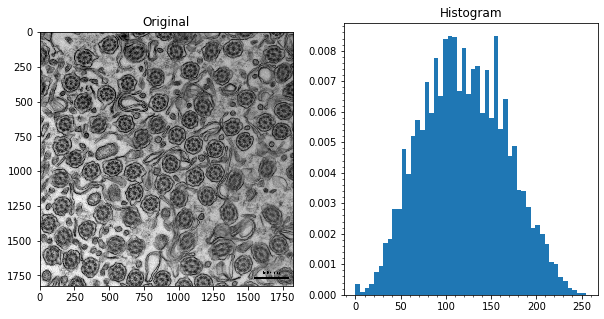

In [24]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Original')

fig.add_subplot(1,2,2)
plt.hist(img_grayscale.reshape(-1), 50, density=True)
plt.minorticks_on()
plt.title('Histogram')

True

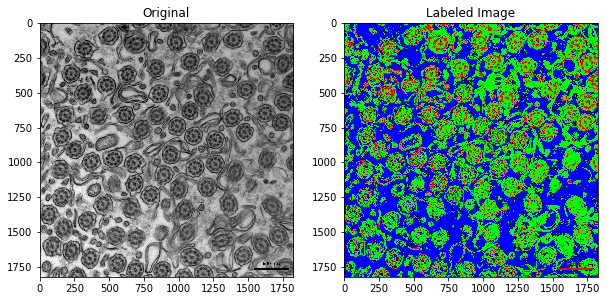

In [47]:
from skimage import img_as_ubyte

img_grayscale_ubyte = img_as_ubyte(img_grayscale)

segm1 = (img_grayscale_ubyte <=60)
segm2 = (img_grayscale_ubyte > 61) & (img_grayscale_ubyte <= 120 )
segm3 = (img_grayscale_ubyte > 129) & (img_grayscale_ubyte <= 256 )

all_segments = np.zeros((img_grayscale.shape[0], img_grayscale.shape[1], 3))

all_segments[segm1] = (1,0,0) #red
all_segments[segm2] = (0,1,0) #green
all_segments[segm3] = (0,0,1) #blue

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Original')

fig.add_subplot(1,2,2)
plt.imshow(all_segments)
plt.title('Labeled Image')

cv2.imwrite('images/cilia_labeled_hist.jpg', all_segments)